# Particle-Particle Particle-Mesh Algorithm

The Particle-Particle Particle-Mesh (PPPM or P3M) algorithm is a Fourier-based Ewald summation method formulated by Hockney and Eastwood in the late 1980s.

## Ewald Sum
The Ewald summation is a method to compute the potential energy of long-range interaction in periodic systems. More details can be found in this Wikipedia [article](https://en.wikipedia.org/wiki/Ewald_summation). In the following we will concentrate on explaining how it is used in the context of Sarkas.

Long range forces are calculated using the Ewald method which consists in dividing the potential into a short
and a long range part. Physically this is equivalent to adding and subtracting a screening cloud around each charge.
This screening cloud is usually chosen to be given by a Gaussian charged density distribution, but it need not be.
The primary reason for choosing a Gaussian is its spherical symmetry. In the following we will calculate the charge density with its surrounding clouds and the corresponding energy density of each.

### Total charge density
Consider a system of $N$ randomly distributed charges whose distribution is given by

$$ \rho_N ( \mathbf r) = \sum_{i = 1}^{N} q_i \delta( \mathbf r - \mathbf r_i). $$

At each point $\mathbf r_i$ we add and substract a Gaussian screening cloud 

$$ \rho_S (\mathbf r) = -\frac{q_i \alpha^{3/2}}{\pi} e^{-\alpha^2 (\mathbf r - \mathbf r_i)^2}. $$

The total charge density at point $\mathbf r$ is then

$$
\rho(\mathbf r) = \sum_{i}^N  \left \{ \left ( q_i\delta( \mathbf r - \mathbf r_i) - \frac{q_i\alpha^{3/2}}{\pi} e^{-\alpha^2 \left( \mathbf r - \mathbf r_i \right )^2 } \right ) + \frac{q_i\alpha^{3/2}}{\pi} e^{-\alpha^2 \left( \mathbf r- \mathbf r_i \right )^2 } \right \},
$$

where, again, the first term is the charge density due to the real particles and the last two terms are the negative
and positive screening clouds. The first two terms are in parenthesis to emphasizes the splitting into

$$
    \rho(\mathbf r)  = \rho_{\mathcal R}(\mathbf r) + \rho_{\mathcal F}(\mathbf r)
$$

$$
    \rho_{\mathcal R} (\mathbf r) = \sum_{i}^N \left ( q_i\delta( \mathbf r- \mathbf r_i) - \frac{q_i\alpha^{3/2}}{\pi} e^{-\alpha^2 \left( \mathbf r- \mathbf r_i \right )^2 } \right ), \quad \rho_{\mathcal F}(\mathbf r) = \sum_{i}^N \frac{q_i\alpha^{3/2}}{\pi} e^{-\alpha^2 \left( \mathbf r- \mathbf r_i \right )^2 }
$$

where $\rho_{\mathcal R}(\mathbf r)$ indicates the charge density leading to the short range part of the potential
and $\rho_{\mathcal F}(\mathbf r)$ leading to the long range part. The subscripts $\mathcal R, \mathcal F$ stand for Real and Fourier space indicating the way the calculation will be done.

The potential at every point $\mathbf r$ is calculated from Poisson's equation

$$
    -\nabla^2 \phi( \mathbf r) = 4\pi \rho_{\mathcal R} (\mathbf r) + 4\pi \rho_{\mathcal F}( \mathbf r).
$$

### Short-range term

The short range term is calculated in the usual way

$$
    -\nabla^2 \phi_{\mathcal R}( \mathbf r) = 4\pi \sum_{i}^N  \left ( q_i\delta( \mathbf r- \mathbf r_i) - \frac{q_i\alpha^{3/2}}{\pi} e^{-\alpha^2 \left( \mathbf r- \mathbf r_i \right )^2 } \right ).
$$

The first term $\delta(\mathbf r - \mathbf r_i)$ leads to the usual Coulomb potential ($\sim 1/r$) while
the Gaussian leads to the error function

$$
    \phi_{\mathcal R}( \mathbf r ) = \sum_i^N  \frac{q_i}{r} - \frac{q_i}{r}\text{erf} (\alpha r)  = \sum_i^N \frac{q_i}{r} \text{erfc}(\alpha r)
$$ (eq:phi_R)

### Long-range term

The long range term is calculated in Fourier space

$$
    k^2 \tilde\phi_{\mathcal F}(k) = 4\pi \tilde\rho_{\mathcal F}(k)
$$

where

$$
    \tilde\rho_{\mathcal F}(k) = \frac{1}{V} \int d\mathbf re^{- i \mathbf k \cdot \mathbf r} \rho_{\mathcal F}( \mathbf r ) = \sum_{i}^N \frac{q_i\alpha^{3/2}}{\pi V} \int d\mathbf r e^{- i \mathbf k \cdot \mathbf r}  e^{-\alpha^2 \left( \mathbf r - \mathbf r_i \right )^2 } = \sum_{i}^N \frac{q_i}{V} e^{-i \mathbf k \cdot \mathbf r_i} e^{-k^2/(4\alpha^2)}.
$$

The potential is then

$$
    \tilde \phi_{\mathcal F}(\mathbf k) = \frac{4\pi}{k^2} \frac{1}{V} \sum_{i}^N q_i e^{-i\mathbf k \cdot \mathbf r_i} e^{-k^2/(4\alpha^2)} = \frac{1}{V} \sum_i^N v(k)e^{-k^2/(4 \alpha^2)} q_i e^{-i \mathbf k \cdot \mathbf r_i}
$$

and in real space

$$
    \phi_{\mathcal R}( \mathbf r ) = \sum_{\mathbf k \neq 0} \tilde \phi_{\mathcal F}(\mathbf k)e^{i \mathbf k \cdot \mathbf r} = \frac{1}{V} \sum_{\mathbf k\neq 0} \sum_{i}^N v(k) e^{-k^2/(4\alpha^2)}q_i e^{i \mathbf k \cdot ( \mathbf r- \mathbf r_i) },
$$(eq:U_R)

where the $\mathbf k = 0$ is removed from the sum because of the overall charge neutrality.

The potential energy created by this long range part is

$$
    U_{\mathcal F} = \frac {1}{2} \sum_i^N q_i \phi_{\mathcal F}(\mathbf r_i) = \frac{1}{2} \frac{1}{V} \sum_{i,j}^N q_i q_j \sum_{\mathbf k \neq 0 } v(k)  e^{-k^2/(4\alpha^2)}e^{i \mathbf k \cdot ( \mathbf r_i - \mathbf r_j) } = \frac{1}{2} \sum_{\mathbf k \neq 0} |\rho_0(\mathbf k)|^2 v(k) e^{-k^2/(4\alpha^2)},
$$ (eq:U_F)

where I used the definition of the charge density

$$
    \rho_0(\mathbf k) = \frac 1V \sum_i^N q_i e^{i \mathbf k \cdot \mathbf r_i}.
$$

However, in the above sum we are including the self-energy term, i.e. $\mathbf r_i = \mathbf r_j$. This term
can be easily calculated and then removed from $U_{\mathcal F}$

$$
    \frac{\mathcal Q^2}{2V} \sum_{\mathbf k} \frac{4\pi}{k^2} e^{-k^2/(4\alpha^2)} \rightarrow \frac{\mathcal Q^2}{2V} \left ( \frac{L}{2\pi} \right )^3 \int dk (4\pi)^2 e^{-k^2/(4\alpha^2) }  = \mathcal Q^2 \frac{(4\pi)^2}{2V} \left ( \frac{L}{2\pi} \right )^3 \sqrt{\pi } \alpha = \mathcal Q^2 \frac{\alpha}{\sqrt{\pi} }
$$

where $\mathcal Q^2 = \sum_i^N q_i^2$, note that in the integral we have re-included $\mathbf k = 0$, but
this is not a problem. Finally the long-range potential energy is

$$
    U_{\mathcal L} = U_{\mathcal F} - \mathcal Q^2 \frac{\alpha}{\sqrt{\pi} }.
$$ (eq:phi_L)

Up to this point we have the analytical expression for our potential; {eq}`eq:U_R` and {eq}`eq:U_F`. However, computing the sum over $\mathbf k$ in the equation for $U_{\mathcal F}$ is still too slow and we don't know what value of $\mathbf k$ to end the sum.


## Assigning charges onto the mesh
The idea of particle-mesh algorithms is to speed up the calculation of the reciprocal (space) potential $U_{\mathcal F}$ by calculating it on a mesh. However, the particles are scattered at random points in space so we need to distribute them onto the mesh points. For simplicity, we assume the number of grid points $M$ to be identical in all three directions $M = M_x = M_y = M_z$. Define the spacing between two grid points $h = L/M$ and $\mathbb{M}$ the set of all grid points:

$$
    \mathbb{M} = \left \{ \mathbf mh \; : \mathbf m \in \mathbb{Z}^3 \; \textrm{and} \; 0 \leq m_{x,y,z} < M \right \}.
$$

The charge density of the mesh, $\rho_M(\mathbf r)$, is calculated by

$$
    \rho_{M}(\mathbf r) = \int U_p(\mathbf r - \mathbf r') \rho(\mathbf r') d\mathbf r', \quad U_p(\mathbf r) = h^{-3} W_p(\mathbf r), \quad  \mathbf r \in \mathbb{M}
$$

where $W_p(\mathbf r)$ is the charge assignment function of order $p \in \mathbb{N}^+$. In Sarkas we chose it to be a cardinal B-spline with a Fourier transform

$$
    \tilde W_{p}(\mathbf k) = h^3 \left [ \frac{\sin(k_xh/2)}{k_x h/2} \frac{\sin(k_y h/2)}{k_y h/2} \frac{\sin(k_z h/2)}{k_z h/2} \right ]^p.
$$

Substituting the above into $\rho_M(\mathbf r)$ we find
$$
\begin{eqnarray}
    \rho_M (\mathbf r) & = & \int d\mathbf r' h^{-3} W( \mathbf r - \mathbf r')\sum_{i} q_i \delta(\mathbf r' - \mathbf r_i), \\
    & = & h^{-3} \sum_{i} q_i  W( \mathbf r - \mathbf r_i).
\end{eqnarray}
$$

except at the boundaries where the periodicity has to be properly taken into account.

The routine to deposit charges onto the grid is the following,

1. Assume the particle is at position $x_i$.
2. Choose the charge assignment order $p$,
3. Find the coordinate of the closest mesh point to the particle's location, if $p$ is odd. If $p$ is even take the coordinate of the midpoint of between the two nearest mesh points. Denote this by $x_m$
4. Find the $p$ mesh points that are closest to the particle, starting from the far left.
5. The fraction of charge to be deposited on each point is given by $W_p(x_i - x_m)$.

In the following we show a 1D example by calculating $W_p(x)$ for two particles each with a different $p$. We position the particles near the edges to show the periodic boundary conditions.

In [1]:
# Import the usual stuff
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("MSUstyle")

# Random number generator
rng = np.random.default_rng(123456789)

from sarkas.potentials.force_pm import assgnmnt_func, calc_charge_dens, mesh_point_shift, calc_mesh_coord

Text(0.5, 0, '$x/h$')

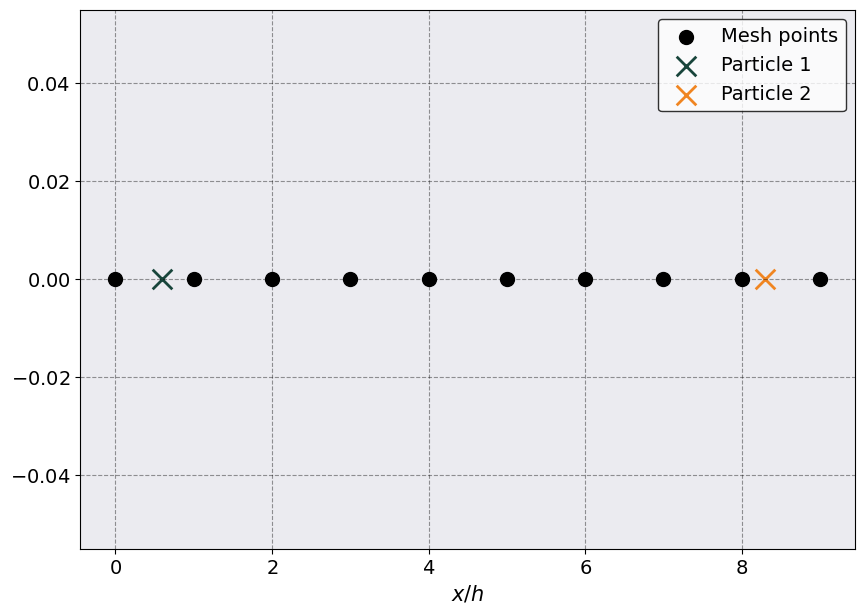

In [2]:
x_1 = 0.6 # position of the particle
x_2 = 8.3 # position of the particle
N_mesh_points = 10
# Grid points
x_mesh = np.arange(0, N_mesh_points)
# grid spacing, chosen to be 1
hx = x_mesh[1] - x_mesh[0] 

# Plot the 1D grid and the particle
plt.scatter(x_mesh, np.zeros_like(x_mesh), c = 'k', s = 100, label = "Mesh points")
plt.scatter(x_1, 0, s = 200, marker = 'x', label = "Particle 1")
plt.scatter(x_2, 0, s = 200, marker = 'x', label = "Particle 2")
plt.legend()
plt.xlabel( r"$x/h$")

The above plot shows the position of the two particles, represented by X's and the location of the mesh points, represented by black dots. Notice that we are rescaling everything by the distance between mesh points, $h$, which we choose to be = 1 for simplicity.

The next code cell calculates the function $W(x)$ which represents the amount of charge to be assigned to each mesh point. Particle 1 is distributed over three points while Particle 2 over four mesh points.

In [4]:
# Calculate the charge assignment function

# Define the charge assignment order, p
cao1 = 3
cao2 = 4

# Define x_m to be the coordinate of the particle's nearest mesh point (if cao is odd)
x_m1 = np.rint(x_1/hx - 0.5 *( cao1 % 2 == 0) ).astype(int)
x_m2 = np.rint(x_2/hx - 0.5 *( cao2 % 2 == 0) ).astype(int)
# The above branchless programming is because int gives the integer value only and not the closest integer

# Distance to the nearest mesh point for p odd
delta_x1 = x_1/hx - x_m1 
# Distance to the midpoint between the two nearest mesh points
delta_x2 = x_2/hx - x_m2 - 0.5

# W_3(x_1 - x_m1), W_5(x_2 - x_m2)
# This returns an array of length = p.
# Each element is the fraction of the charge on each of the p mesh points starting from the far left.
wx1 = assgnmnt_func(cao1, delta_x1)
wx2 = assgnmnt_func(cao2, delta_x2)

# Create a long array to plot on the entire x range
full_wx1 = np.zeros( len(x_mesh) )
full_wx2 = np.zeros( len(x_mesh) )

# Note that you need to shift to the left due to zero indexing
ixn = x_m1 - int(cao1/2.0)
for ix in range(cao1):
    # Check for BC 
    if ixn < 0:
        index = ixn + N_mesh_points

    elif ixn > (N_mesh_points -1 ):
        index = ixn - N_mesh_points
    else:
        index = ixn
    
    full_wx1[index] = wx1[ix]
    ixn += 1
    
# Note that you need to shift to the left due to zero indexing
ixn = x_m2 - int(cao2/2.0 - 1)   
for ix in range(cao2):
    # Check for BC 
    if ixn < 0:
        index = ixn + N_mesh_points
    elif ixn > (N_mesh_points -1 ):
        index = ixn - N_mesh_points
    else:
        index = ixn

    full_wx2[index] = wx2[ix]
    ixn += 1

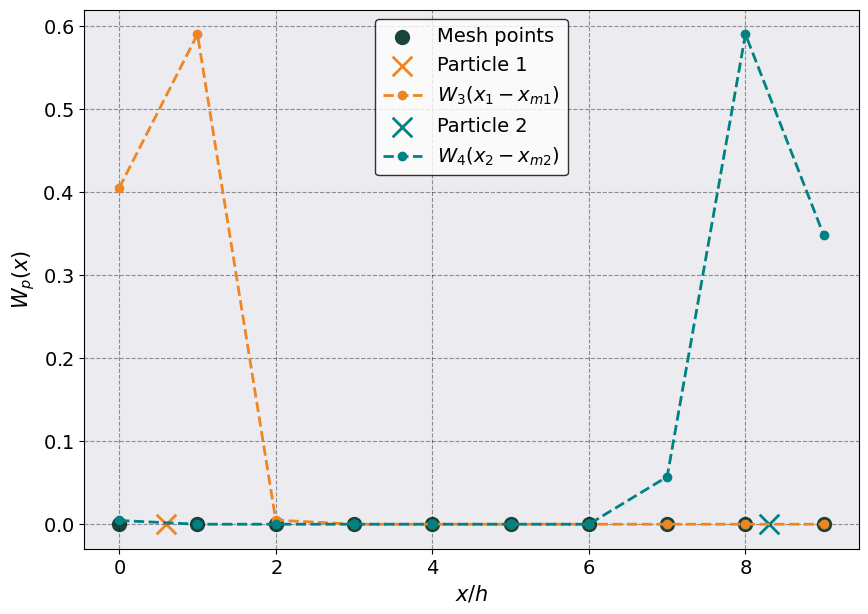

In [5]:
# Make the plot
plt.scatter(x_mesh, np.zeros_like(x_mesh), s = 100, label = "Mesh points")
p1 = plt.scatter(x_1, 0, s = 200, marker = 'x', label = "Particle 1")
plt.plot(x_mesh, full_wx1, '--o', c = p1.get_facecolor(), label = r"$W_3(x_1 - x_{m1})$")

p2 = plt.scatter(x_2, 0, s = 200, marker = 'x', label = "Particle 2")
plt.plot(x_mesh, full_wx2, '--o', c = p2.get_facecolor(), label = r"$W_4(x_2 - x_{m2})$")

# plt.plot(x_mesh, full_wx1 + full_wx2, ls ='--', label = r"$W_3(x) + W_4(x)$")

plt.legend()
_ = plt.ylabel(r"$W_p(x)$")
_ = plt.xlabel(r"$x/h$")

As you can see the first (orange) particle is distributed on the three mesh points (9, 0, 1) while the second (green) particle onto the four mesh points (7, 8, 9, 0). 

The algorithm described above can be extended to 3D and it is what is contained in the function [calc_charge_dens](../api/potentials_subpckg/sarkas.potentials.force_pm.rst). In the following we will present an example with randomly distributed charges on a 2D plane for visualization.

In [8]:
# Calculate the charge assignment function

# Define the charge assignment order, p
cao1 = 3
cao2 = 3
x = 45.51
y = 45.51

L = 64
mesh = np.array([1, 1]) * 16
xgrid, ygrid = np.mgrid[0:L:16j, 0:L:16j]
hs = L/mesh

# Define x_m to be the coordinate of the particle's nearest mesh point (if cao is odd)
x_m = np.rint(x/hs[0] - 0.5 *( cao1 % 2 == 0) ).astype(int)
y_m = np.rint(y/hs[1] - 0.5 *( cao2 % 2 == 0) ).astype(int)

# The above branchless programming is because int gives the integer value only and not the closest integer

# Distance to the nearest mesh point for p odd
delta_x = x/hs[0] - (x_m + 0.5 *( cao1 % 2 == 0))
# Distance to the midpoint between the two nearest mesh points
delta_y = y/hs[1] - (y_m + 0.5 *( cao2 % 2 == 0))

# This returns an array of length = p.
# Each element is the fraction of the charge on each of the p mesh points starting from the far left.
wx = assgnmnt_func(cao1, delta_x)
wy = assgnmnt_func(cao2, delta_y)

# Create a long array to plot on the entire x range
full_wx = np.zeros( mesh[0]) 
full_wy = np.zeros( mesh[1]) 
rho_2D = np.zeros( (mesh[0], mesh[1]) )
                  
# Note that you need to shift to the left due to zero indexing
ixn = x_m - int(cao1/2.0 - 1 * (cao1 %2 == 0) )
for ix in range(cao1):
    
    # Check for BC 
    index_x = ixn + N_mesh_points * (ixn < 0) - N_mesh_points*( ixn > (N_mesh_points - 1) )

    # Note that you need to shift to the left due to zero indexing
    iyn = y_m - int(cao2/2.0 -  1 * (cao1 %2 == 0) )   

    for iy in range(cao2):
        # Check for BC 
        index_y = iyn + N_mesh_points * (iyn < 0) - N_mesh_points*( iyn > (N_mesh_points - 1) )

        rho_2D[index_x, index_y] += wx[ix] * wy[iy]
        iyn += 1
    ixn += 1

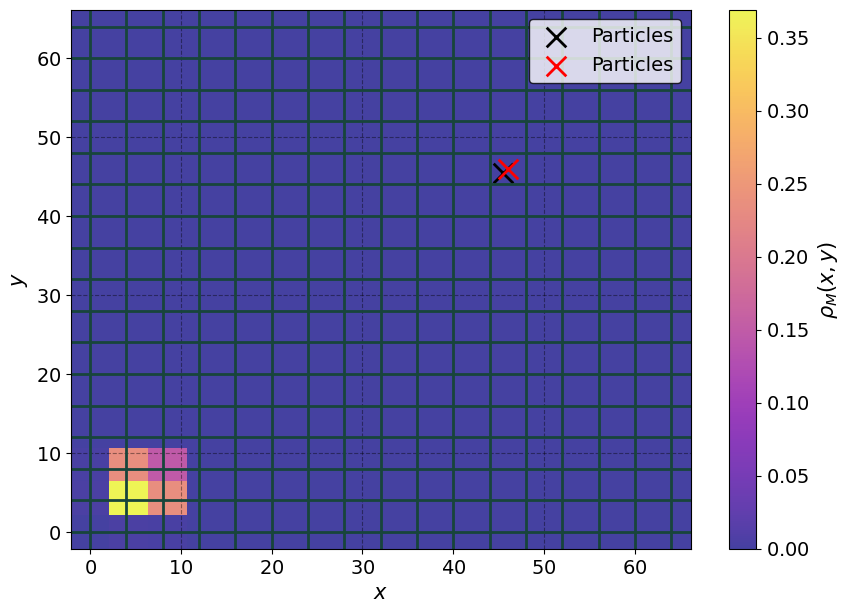

In [11]:
# Make the plot
fig, ax = plt.subplots(1,1)
p1 = ax.pcolormesh(xgrid, ygrid, rho_2D, cmap = plt.cm.plasma, alpha = 0.75)
fig.colorbar(p1, label = r"$\rho_M(x,y)$")
ax.scatter(x, y, s = 200, marker = "x", c = 'k', label = "Particles")
ax.scatter( (x_m + 0.5)*hs[1] , (y_m + 0.5) * hs[1], s = 200, marker = "x", c = 'r', label = "Particles")
for i in range(mesh[0] + 1):
    ax.axhline(i * hs[0])

for j in range(mesh[1] + 1):
    ax.axvline(j* hs[1])

    
ax.legend()
_ = ax.set( xlabel = r"$x$", ylabel = r"$y$")


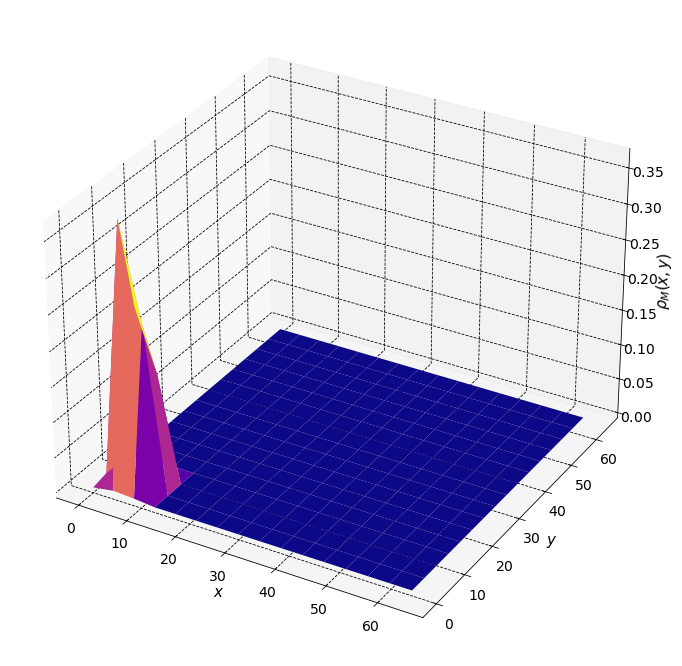

In [7]:
plt.rcParams["axes.facecolor"] = [1, 1, 1]
fig, ax = plt.subplots(figsize=(12, 12),subplot_kw={"projection": "3d"})

ax.plot_surface(xgrid, ygrid, rho_2D, cmap = plt.cm.plasma)
# Uncomment the following if you want to see images of the rho_m duplicated.
# ax.plot_surface(xgrid - L, ygrid, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid - L, ygrid - L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid , ygrid - L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid , ygrid + L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid + L , ygrid + L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid + L , ygrid, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid + L , ygrid - L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid - L , ygrid + L, rho_m[0].T, cmap = plt.cm.plasma)
_ = ax.set( xlabel = r"$x$", ylabel = r"$y$", zlabel = r"$\rho_M(x,y)$")

In [8]:
# Number of particles
N = 15
# Box length
L = (4* np.pi * N/3)**(1./3.)
box_lengths = np.ones(3) * L
box_lengths[2] = 0.0

# Charge assignment order
cao = np.array([4, 4, 1])
# Array of mesh points. Note in the case of 2D you still need to pass 1 for the z-mesh
M = 32
mesh_sz = np.array([M, M, 1])
xgrid, ygrid = np.mgrid[0:L:32j, 0:L:32j]

# Spacings
h_array = box_lengths/mesh_sz
h_array[2] = 0.0
# print(h_array)

# Particles positions
pos = L * rng.random( size = (N, 3))
pos[:,2] = 0.0 # set the z-coord to 0

charges = np.ones( N, dtype = float)
# Calculate the charge density
mid, pshift = mesh_point_shift(cao)
mesh_pos, mesh_points = calc_mesh_coord(pos, h_array, mesh_sz, cao)
rho_m = calc_charge_dens(mesh_pos, mesh_points, charges, cao, mesh_sz, mid, pshift)
print(pshift)

TypeError: too many arguments: expected 3, got 4

The first thing to note is the shape of the charge density; it is ( z_mesh, y_mesh, x_mesh). This is a legacy feature that has not been removed. 

Let's plot the charge density

In [ ]:
# I am getting a deprecation warning from matplotlib about the grid in pcolor.
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

fig, ax = plt.subplots(1,1)
p1 = ax.pcolormesh(xgrid, ygrid, rho_m[0].T, cmap = plt.cm.plasma, alpha = 0.75)
fig.colorbar(p1, label = r"$\rho_M(x,y)$")
ax.scatter(pos[:,0], pos[:,1], s = 200, marker = "x", c = 'k', label = "Particles")

for i in range(mesh_sz[0]):
    ax.axhline(i* h_array[0])

for j in range(mesh_sz[1]):
    ax.axvline(j* h_array[1])

    
ax.legend()
_ = ax.set( xlabel = r"$x$", ylabel = r"$y$")

In [ ]:
plt.rcParams["axes.facecolor"] = [1, 1, 1]
fig, ax = plt.subplots(figsize=(12, 12),subplot_kw={"projection": "3d"})

ax.plot_surface(xgrid, ygrid, rho_m[0].T, cmap = plt.cm.plasma)
# Uncomment the following if you want to see images of the rho_m duplicated.
# ax.plot_surface(xgrid - L, ygrid, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid - L, ygrid - L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid , ygrid - L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid , ygrid + L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid + L , ygrid + L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid + L , ygrid, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid + L , ygrid - L, rho_m[0].T, cmap = plt.cm.plasma)
# ax.plot_surface(xgrid - L , ygrid + L, rho_m[0].T, cmap = plt.cm.plasma)
_ = ax.set( xlabel = r"$x$", ylabel = r"$y$", zlabel = r"$\rho_M(x,y)$")